In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
df_auditoria_aplicacao = pd.read_csv('../data/raw/Auditoria_Aplicacao_Data_1.csv',sep=';')
print(df_auditoria_aplicacao.shape)
df_auditoria_aplicacao.head()

(1000000, 13)


,DATA PROCESSAMENTO,DATA EVENTO,MODULO,CPF,ACAO,NOME,E-MAIL,TIPO,ESTADO,STATUS,RESOURCE,CLIENT_ID,AUDITORIA APLICACAO
0,2019-07-10 16:06:45.67,2019-07-10 16:06:45,API_PORTAL,34894024407,NaN,NOME 34894024407,NOME34894024407@email.com,NaN,NaN,SUCCESS,NOTIFICACOES,acesso.gov.br,True
1,2019-07-10 16:06:49.861,2019-07-10 16:06:49,API_PORTAL,34402518252,Cadastro,NOME 34402518252,NOME34402518252@email.com,SMS,PA_EP,SUCCESS,EMAIL_SMS,acesso.gov.br,True
2,2019-07-10 16:06:51.993,2019-07-10 16:06:51,API_PORTAL,34641345139,NaN,NOME 34641345139,NOME34641345139@email.com,NaN,NaN,SUCCESS,NOTIFICACOES,acesso.gov.br,True
3,2019-07-10 16:06:47.075,2019-07-10 16:06:46,API_PORTAL,34578456840,NaN,NOME 34578456840,NOME34578456840@email.com,NaN,NaN,SUCCESS,NOTIFICACOES,acesso.gov.br,True
4,2019-07-10 16:06:46.787,2019-07-10 16:06:46,API_PORTAL,34808234821,Cadastro,NOME 34808234821,NOME34808234821@email.com,SMS,PA_CF,SUCCESS,EMAIL_SMS,acesso.gov.br,True


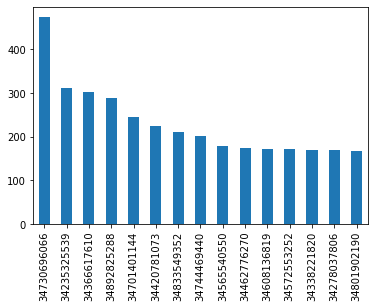

In [3]:
df_auditoria_aplicacao.CPF.value_counts()[:15].plot.bar()

In [4]:
df_auditoria_aplicacao = df_auditoria_aplicacao[['DATA EVENTO','CPF','STATUS']]

In [5]:
df_auditoria_aplicacao.head()

,DATA EVENTO,CPF,STATUS
0,2019-07-10 16:06:45,34894024407,SUCCESS
1,2019-07-10 16:06:49,34402518252,SUCCESS
2,2019-07-10 16:06:51,34641345139,SUCCESS
3,2019-07-10 16:06:46,34578456840,SUCCESS
4,2019-07-10 16:06:46,34808234821,SUCCESS


In [6]:
import tqdm
from faker import Faker
from faker.providers import internet

fake = Faker()
fake.add_provider(internet)

random_ips = pd.Series()
for ix in tqdm.tqdm_notebook(range(0,df_auditoria_a
                                   plicacao.shape[0])):
    random_ips = random_ips.append(pd.Series(fake.ipv4_public(address_class='c')))

In [15]:
df_auditoria_aplicacao.reset_index(drop=True,inplace=True)
random_ips.reset_index(drop=True,inplace=True)
df_auditoria_aplicacao['REMOTE ADDRESS'] = random_ips

In [14]:
#df_auditoria_aplicacao.insert(2,'REMOTE ADDRESS',random_ips)

In [16]:

df_auditoria_aplicacao.to_csv("ips-processed.csv")

In [18]:
df_auditoria_aplicacao.head()

,DATA EVENTO,CPF,STATUS,REMOTE ADDRESS
0,2019-07-10 16:06:45,34894024407,SUCCESS,192.31.221.248
1,2019-07-10 16:06:49,34402518252,SUCCESS,192.56.54.69
2,2019-07-10 16:06:51,34641345139,SUCCESS,192.30.180.55
3,2019-07-10 16:06:46,34578456840,SUCCESS,192.49.255.9
4,2019-07-10 16:06:46,34808234821,SUCCESS,192.67.0.200


In [19]:
df_auditoria_aplicacao['REMOTE ADDRESS'].value_counts()

198.51.101.202    56
198.51.101.220    54
192.0.3.40        54
192.0.3.87        53
192.31.197.103    52
                  ..
192.13.134.241     1
192.20.131.77      1
192.88.87.125      1
203.5.235.32       1
198.20.45.101      1
Name: REMOTE ADDRESS, Length: 676643, dtype: int64